In [26]:
import sys, os
import pandas as pd
sys.path.append(os.path.realpath('..'))
from MiningBot.AuditHistory.History import History
import json
import socket
from datetime import datetime, timedelta


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import hex2color
import matplotlib.colors as mc
import mplcyberpunk
plt.style.use("cyberpunk")
plt.rcParams['figure.facecolor'] = '#0d1117'
plt.rcParams['axes.facecolor'] = '#0d1117'
plt.rcParams['savefig.facecolor'] = '#0d1117'

In [28]:
config_dir = r'../MiningBot/Configs/configs.json'
config = json.load(open(config_dir))[socket.gethostname()]

In [29]:
log = History(config_dir=config_dir)

In [30]:
records = log.get_all()

In [31]:
df = pd.DataFrame(records)
df = df.sort_values(by='datetime', ascending=False)
df['datetime'] = pd.to_datetime(df['datetime'])
df['timedelta'] = df['datetime'].diff().dt.seconds.div(60, fill_value=0)
df

,_id,datetime,action,context,timedelta
16,63fc022b60183a89f03867a4,2023-02-27 01:06:51.814,Extraction,,0.000000
15,63fc00c060183a89f03867a3,2023-02-27 01:00:48.413,Extraction,,1433.933333
14,63fc00b760183a89f03867a2,2023-02-27 01:00:39.414,Navigating,Site One Beta,1439.850000
13,63fc007260183a89f03867a1,2023-02-27 00:59:30.843,Navigating,Site Three Alpha,1438.850000
12,63fc002e60183a89f03867a0,2023-02-27 00:58:22.283,Navigating,Site One Alpha,1438.850000
11,63fbffe960183a89f038679f,2023-02-27 00:57:13.683,Navigating,Site Two Alpha,1438.850000
10,63fbff6d60183a89f038679e,2023-02-27 00:55:09.064,Unload,,1437.916667
9,63fbfeb460183a89f038679d,2023-02-27 00:52:04.133,Navigating,Home,1436.916667
8,63fbfe0260183a89f038679c,2023-02-27 00:49:06.293,Extraction,,1437.033333
7,63fbfdf960183a89f038679b,2023-02-27 00:48:57.293,Navigating,Site One Beta,1439.850000


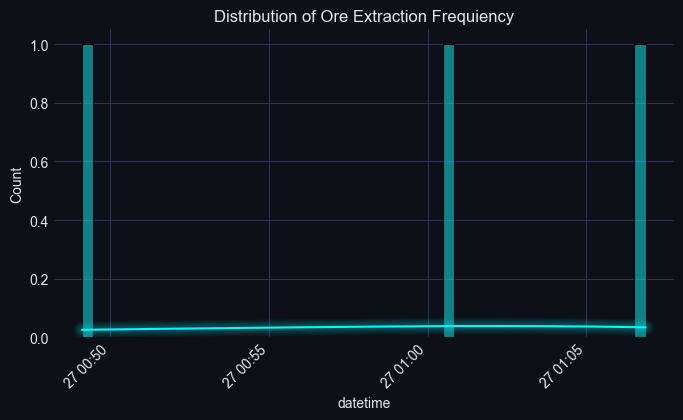

In [32]:
histplot_hyperparams = {
    'kde':True,
    'alpha':0.5,
    #'stat':'percent',
    'bins':50
}


n_cols = 1
n_rows = 1
cell_with_dim = 8
cell_height_dim = 4

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * cell_with_dim, n_rows * cell_height_dim))
plt.title('Distribution of Ore Extraction Frequiency')
sns.histplot(df[df['action']=='Extraction']['datetime'], label='Train X', color='#08F7FE', ax=ax, **histplot_hyperparams)
plt.xticks(rotation=45, ha='right')
mplcyberpunk.make_lines_glow(ax)